# Import dataset

In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import pickle
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

#set folder path
folder = 'data'
#fd = folder + '/uncorrupted_signal_folder'
#fd_km = fd + '/Clusters4096'
fd = folder
fd_km = fd

In [2]:
data_train = pd.read_pickle(fd_km + '/data_train_v1').reset_index().iloc[:,1:] #full set
data_test = pd.read_pickle(fd_km + '/data_test_v1').reset_index().iloc[:,1:]  

In [3]:
data_train

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
...,...,...,...,...,...,...
1385078,10000,66500,0.000118,0.000253,0.000761,2393
1385079,10000,67000,0.000097,0.000186,0.000755,1893
1385080,10000,67500,0.000078,0.000113,0.000743,1393
1385081,10000,68000,0.000060,0.000037,0.000718,893


In [4]:
data_train[data_train.ID == 1]

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
...,...,...,...,...,...,...
132,1,66000,0.000095,0.000178,0.000754,2053
133,1,66500,0.000078,0.000112,0.000743,1553
134,1,67000,0.000062,0.000044,0.000721,1053
135,1,67500,0.000047,-0.000022,0.000684,553


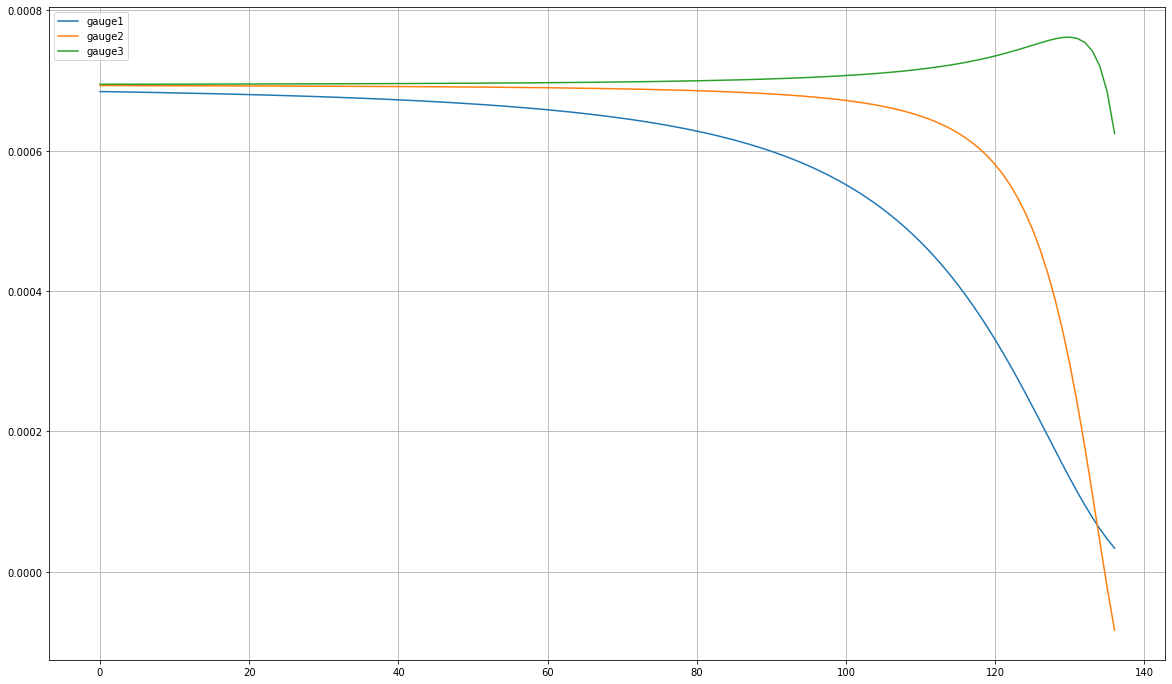

In [5]:
plt.figure(figsize=(20, 12))
plt.plot(data_train[data_train.ID == 1]['gauge1'],label= 'gauge1')
plt.plot(data_train[data_train.ID == 1][ 'gauge2'],label= 'gauge2')
plt.plot(data_train[data_train.ID == 1]['gauge3'], label= 'gauge3')
plt.grid()
plt.legend()
plt.show()

In [6]:
data_train.head(10)

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
5,1,2500,0.000683,0.000693,0.000695,65553
6,1,3000,0.000683,0.000693,0.000695,65053
7,1,3500,0.000683,0.000693,0.000695,64553
8,1,4000,0.000683,0.000693,0.000695,64053
9,1,4500,0.000683,0.000693,0.000695,63553


In [7]:
data_test[data_test.ID==1]

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,64540
1,1,500,0.000684,0.000693,0.000695,64040
2,1,1000,0.000684,0.000693,0.000695,63540
3,1,1500,0.000684,0.000693,0.000695,63040
4,1,2000,0.000684,0.000693,0.000695,62540
5,1,2500,0.000684,0.000693,0.000695,62040
6,1,3000,0.000683,0.000693,0.000695,61540
7,1,3500,0.000683,0.000693,0.000695,61040
8,1,4000,0.000683,0.000693,0.000695,60540
9,1,4500,0.000683,0.000693,0.000695,60040


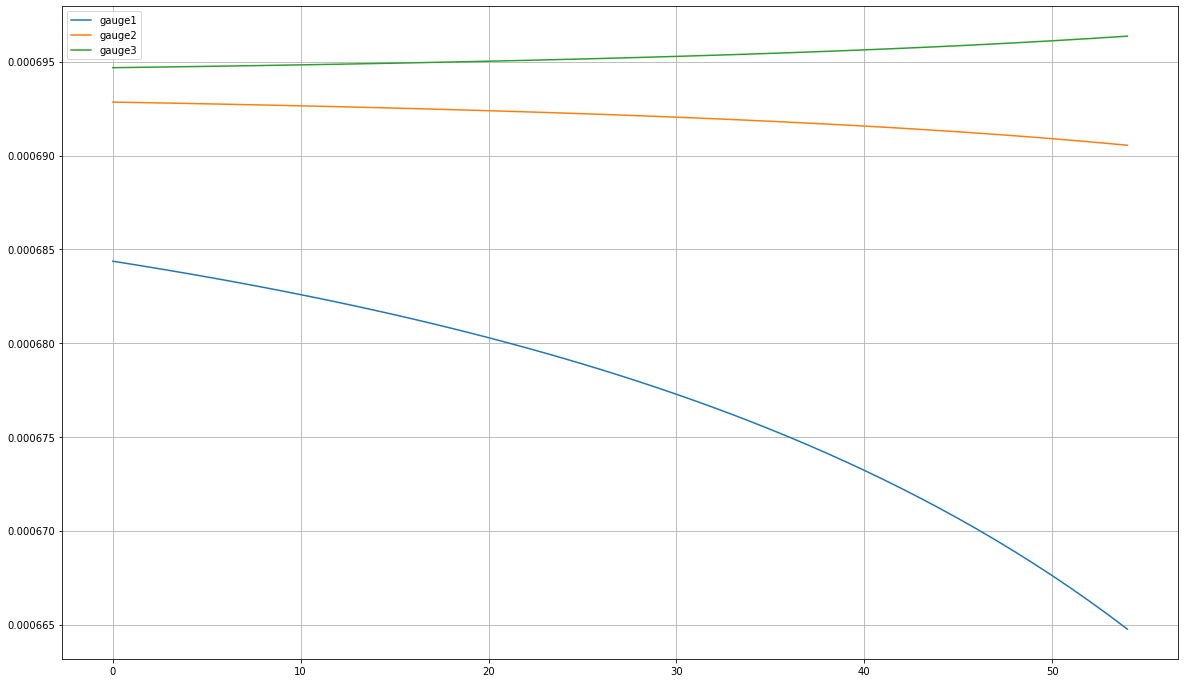

In [8]:
plt.figure(figsize=(20, 12))
plt.plot(data_test[data_test.ID == 1]['gauge1'],label= 'gauge1')
plt.plot(data_test[data_test.ID == 1][ 'gauge2'],label= 'gauge2')
plt.plot(data_test[data_test.ID == 1]['gauge3'], label= 'gauge3')
plt.grid()
plt.legend()
plt.show()

# Categorise RUL data

In [9]:
print(data_train.RUL.describe())
print(data_test.RUL.describe())

count    1.385083e+06
mean     3.477047e+04
std      2.023644e+04
min      0.000000e+00
25%      1.731200e+04
50%      3.462700e+04
75%      5.193900e+04
max      8.189600e+04
Name: RUL, dtype: float64
count     8782.000000
mean     45427.648144
std      15643.733322
min       3964.000000
25%      34177.000000
50%      46891.000000
75%      57867.500000
max      79327.000000
Name: RUL, dtype: float64


[    0.           221.6066482    886.4265928   1994.4598338
  3545.70637119  5540.16620499  7977.83933518 10858.72576177
 14182.82548476 17950.13850416 22160.66481994 26814.40443213
 31911.35734072 37451.52354571 43434.90304709 49861.49584488
 56731.30193906 64044.32132964 71800.55401662 80000.        ]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


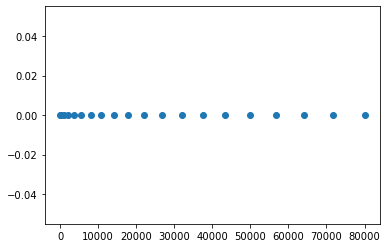

In [10]:
l=0.5
nb_bins = 20
lower_bin_bound = 0
upper_bin_bound = 80000

bins = np.linspace(lower_bin_bound, upper_bin_bound**(1-l), nb_bins)**(1/l)
labels=[i for i in range(bins.shape[0]-1)]
plt.plot(bins,np.full(bins.shape[0],0),'o')
print(bins)
print(labels)

In [11]:
data_train['RUL_bins'] = pd.cut(data_train['RUL'], bins=bins, labels=labels)
data_test['RUL_bins'] = pd.cut(data_test['RUL'], bins=bins, labels=labels)

In [12]:
display(data_train)
display(data_test)

,ID,cycle,gauge1,gauge2,gauge3,RUL,RUL_bins
0,1,0,0.000684,0.000693,0.000695,68053,17
1,1,500,0.000684,0.000693,0.000695,67553,17
2,1,1000,0.000684,0.000693,0.000695,67053,17
3,1,1500,0.000684,0.000693,0.000695,66553,17
4,1,2000,0.000684,0.000693,0.000695,66053,17
...,...,...,...,...,...,...,...
1385078,10000,66500,0.000118,0.000253,0.000761,2393,3
1385079,10000,67000,0.000097,0.000186,0.000755,1893,2
1385080,10000,67500,0.000078,0.000113,0.000743,1393,2
1385081,10000,68000,0.000060,0.000037,0.000718,893,2


,ID,cycle,gauge1,gauge2,gauge3,RUL,RUL_bins
0,1,0,0.000684,0.000693,0.000695,64540,17
1,1,500,0.000684,0.000693,0.000695,64040,16
2,1,1000,0.000684,0.000693,0.000695,63540,16
3,1,1500,0.000684,0.000693,0.000695,63040,16
4,1,2000,0.000684,0.000693,0.000695,62540,16
...,...,...,...,...,...,...,...
8777,100,22000,0.000670,0.000691,0.000696,43346,13
8778,100,22500,0.000670,0.000691,0.000696,42846,13
8779,100,23000,0.000669,0.000691,0.000696,42346,13
8780,100,23500,0.000669,0.000691,0.000696,41846,13


# Build sequences

In [13]:
#utils 
nb_gauges = 3
data_tr = data_train[data_train.ID <= 100]
data_val = data_test[data_test.ID <= 100]

#prepare forecasting data
def gen_X_sequence(id_df, seq_length, seq_cols,timesteps_pred,  type_data = None):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    
    
    ind_start = 0
    
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0+ind_start, num_elements-seq_length+1-timesteps_pred), range(seq_length+ind_start, num_elements+1-timesteps_pred)):
        yield data_array[start:stop, :]
 

def gen_Y_sequence(id_df, seq_length, seq_cols,timesteps_pred, type_data = None):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    
    
    ind_start = 0
    
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0+ind_start, num_elements-seq_length+1-timesteps_pred), range(seq_length+ind_start, num_elements+1-timesteps_pred)):
        yield data_array[stop-1, :]#data_array[start+1:stop+1, :]
   



 #prepare data
seq_cols =  ['gauge'+str(i) for i in range(1,4)]#['label'+str(i) for i in range(1,4)]
seq_cols1 =  ['RUL_bins']
sequence_length = 30
timesteps_pred = 1



#training set
seq_gen = (list(gen_X_sequence(data_tr[data_tr['ID']==id], sequence_length, seq_cols, timesteps_pred, type_data= 'train')) 
                   for id in data_tr['ID'].unique())
# generate sequences and convert to numpy array
dbX = np.concatenate(list(seq_gen))



seq_gen = (list(gen_Y_sequence(data_tr[data_tr['ID']==id], sequence_length, seq_cols1, timesteps_pred, type_data= 'train')) 
                   for id in data_tr['ID'].unique())
# generate sequences and convert to numpy array
dbY = np.concatenate(list(seq_gen))#.astype(np.long).reshape(-1,)

# add one dimension
dbX = dbX[..., np.newaxis]

print(dbX.shape)
print(dbY.shape)

#test set
seq_gen = (list(gen_X_sequence(data_val[data_val['ID']==id], sequence_length, seq_cols, timesteps_pred, type_data= 'train')) 
                   for id in data_val['ID'].unique())
# generate sequences and convert to numpy array
dbX_val = np.concatenate(list(seq_gen))#.astype(np.long)

seq_gen = (list(gen_Y_sequence(data_val[data_val['ID']==id], sequence_length, seq_cols1, timesteps_pred, type_data= 'train')) 
                   for id in data_val['ID'].unique())
# generate sequences and convert to numpy array
dbY_val = np.concatenate(list(seq_gen))#.astype(np.long).reshape(-1,)

# add one dimension
dbX_val = dbX_val[..., np.newaxis]

# dbX_val = (dbX_val + 1)/2
# dbY_val = (dbY_val + 1)/2
print(dbX_val.shape)
print(dbY_val.shape)

(10956, 30, 3, 1)
(10956, 1)
(5782, 30, 3, 1)
(5782, 1)


# Normalize data

In [14]:
dbX
dbX_val

array([[[[0.00068437],
         [0.00069285],
         [0.00069468]],

        [[0.00068421],
         [0.00069283],
         [0.00069469]],

        [[0.00068404],
         [0.00069281],
         [0.00069471]],

        ...,

        [[0.00067827],
         [0.00069216],
         [0.0006952 ]],

        [[0.00067795],
         [0.00069212],
         [0.00069523]],

        [[0.00067762],
         [0.00069208],
         [0.00069525]]],


       [[[0.00068421],
         [0.00069283],
         [0.00069469]],

        [[0.00068404],
         [0.00069281],
         [0.00069471]],

        [[0.00068388],
         [0.00069279],
         [0.00069472]],

        ...,

        [[0.00067795],
         [0.00069212],
         [0.00069523]],

        [[0.00067762],
         [0.00069208],
         [0.00069525]],

        [[0.00067728],
         [0.00069204],
         [0.00069528]]],


       [[[0.00068404],
         [0.00069281],
         [0.00069471]],

        [[0.00068388],
         [0.00069279],

# One-hot encoding

In [15]:
from tensorflow.keras.utils import to_categorical

dbY = to_categorical(dbY,nb_bins)
dbY_val = to_categorical(dbY_val,nb_bins)

# Build model

In [16]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.optimizers import Adam

In [17]:
# Model based on 
model = Sequential()  # Instantiate sequential model
model.add(Conv2D(10, (10, 1), activation='tanh', padding="same", input_shape=(dbX.shape[1], dbX.shape[2], dbX.shape[3])))
#model.add(MaxPooling2D((3, 1)))
model.add(Conv2D(10, (10, 1), activation='tanh', padding="same"))
model.add(Conv2D(10, (10, 1), activation='tanh', padding="same"))
model.add(Conv2D(10, (10, 1), activation='tanh', padding="same"))
model.add(Conv2D(1, (3, 1), activation='tanh', padding="same"))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(dbY.shape[1], activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 3, 10)         110       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 3, 10)         1010      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 3, 10)         1010      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 3, 10)         1010      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 3, 1)          31        
_________________________________________________________________
flatten (Flatten)            (None, 90)                0         
_________________________________________________________________
dropout (Dropout)            (None, 90)                0

In [19]:
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [20]:
batch_size = 512
epochs = 100
history = model.fit(dbX, dbY, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(dbX_val, dbY_val))

Epoch 1/100
22/22 - 3s - loss: 2.9306 - accuracy: 0.0711 - val_loss: 2.6441 - val_accuracy: 0.0809
Epoch 2/100
22/22 - 3s - loss: 2.7759 - accuracy: 0.0925 - val_loss: 2.4944 - val_accuracy: 0.2027
Epoch 3/100
22/22 - 3s - loss: 2.7136 - accuracy: 0.1022 - val_loss: 2.4697 - val_accuracy: 0.2027
Epoch 4/100
22/22 - 3s - loss: 2.6964 - accuracy: 0.0965 - val_loss: 2.4613 - val_accuracy: 0.2027
Epoch 5/100
22/22 - 2s - loss: 2.6831 - accuracy: 0.0975 - val_loss: 2.4484 - val_accuracy: 0.2027
Epoch 6/100
22/22 - 2s - loss: 2.6721 - accuracy: 0.1045 - val_loss: 2.4438 - val_accuracy: 0.2027
Epoch 7/100
22/22 - 2s - loss: 2.6685 - accuracy: 0.1071 - val_loss: 2.4189 - val_accuracy: 0.2027
Epoch 8/100
22/22 - 3s - loss: 2.6616 - accuracy: 0.1054 - val_loss: 2.4101 - val_accuracy: 0.2027
Epoch 9/100
22/22 - 3s - loss: 2.6587 - accuracy: 0.1036 - val_loss: 2.4240 - val_accuracy: 0.2027
Epoch 10/100
22/22 - 3s - loss: 2.6532 - accuracy: 0.1029 - val_loss: 2.4282 - val_accuracy: 0.2027
Epoch 11/

22/22 - 2s - loss: 2.6096 - accuracy: 0.1119 - val_loss: 2.4142 - val_accuracy: 0.2027
Epoch 84/100
22/22 - 2s - loss: 2.6089 - accuracy: 0.1082 - val_loss: 2.4111 - val_accuracy: 0.2027
Epoch 85/100
22/22 - 2s - loss: 2.6083 - accuracy: 0.1129 - val_loss: 2.3934 - val_accuracy: 0.2027
Epoch 86/100
22/22 - 3s - loss: 2.6106 - accuracy: 0.1132 - val_loss: 2.4052 - val_accuracy: 0.2027
Epoch 87/100
22/22 - 3s - loss: 2.6074 - accuracy: 0.1129 - val_loss: 2.4193 - val_accuracy: 0.2027
Epoch 88/100
22/22 - 2s - loss: 2.6049 - accuracy: 0.1065 - val_loss: 2.4068 - val_accuracy: 0.2027
Epoch 89/100
22/22 - 2s - loss: 2.6064 - accuracy: 0.1156 - val_loss: 2.3979 - val_accuracy: 0.2027
Epoch 90/100
22/22 - 2s - loss: 2.6018 - accuracy: 0.1145 - val_loss: 2.3940 - val_accuracy: 0.2027
Epoch 91/100
22/22 - 2s - loss: 2.5999 - accuracy: 0.1094 - val_loss: 2.3868 - val_accuracy: 0.2027
Epoch 92/100
22/22 - 3s - loss: 2.5964 - accuracy: 0.1146 - val_loss: 2.4453 - val_accuracy: 0.2027
Epoch 93/100


In [21]:
model.evaluate(dbX_val, dbY_val)

181/181 [==============================] - 1s 5ms/step - loss: 2.3162 - accuracy: 0.2029


[2.3162081241607666, 0.20287097990512848]

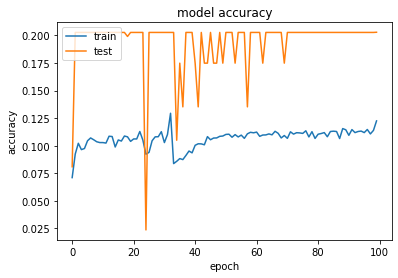

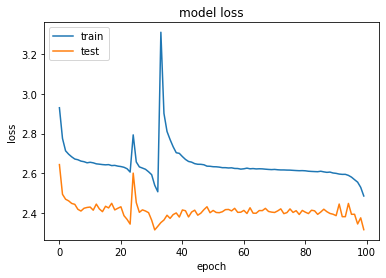

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
from datetime import datetime
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d%m%Y%H%M%S")
model.save('PIR_CNN_Model1_' + timestampStr + '.h5')

In [23]:
model.predict(dbX_val[0:1])

array([[5.6029821e-05, 3.2969238e-03, 1.0721499e-02, 1.6826615e-02,
        2.3047820e-02, 3.1673022e-02, 4.2844996e-02, 5.4169912e-02,
        6.7021191e-02, 8.0469795e-02, 9.0054050e-02, 1.0169996e-01,
        1.1201356e-01, 1.2375819e-01, 1.2920479e-01, 9.3299873e-02,
        1.9773327e-02, 3.0778792e-05, 2.2718115e-05, 1.4981342e-05]],
      dtype=float32)

In [24]:
label = np.argmax(dbY_val[0])
print('The actual RUL is: ' + str(bins[label]) + '-' + str(bins[label+1]))
label = np.argmax(model.predict(dbX_val)[0])
print('The predicted RUL is: ' + str(bins[label]) + '-' + str(bins[label+1]))

The actual RUL is: 49861.495844875346-56731.30193905817
The predicted RUL is: 43434.903047091415-49861.495844875346
